In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special as sp
import sympy
from IPython.display import Image
from matplotlib import rc

import warnings

import utils

warnings.simplefilter("ignore")

In [2]:
workdir = 'figures/conduit_flow'
utils.make_dir_if_missing(workdir)

In [3]:
labelsize = 14
figsize = (5, 4.5)
ext = "eps"
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
params = {
    'figure.figsize': figsize,
    # 'text.usetex' : True,
    'font.size' : 12,
    # 'font.family' : 'iopams',
    'axes.labelsize': labelsize,
    'legend.fontsize': 12,
    # 'text.latex.unicode': True,
}
plt.rcParams.update(params)

In [4]:
# PATH = os.path.join("/home/lmolel/OneDrive/PhD/Figures/")

In [5]:
# Image(filename=os.path.join(PATH, "conduit.png"))#, width=100, height=100)

In [6]:
# Image(filename=os.path.join(PATH, "conduit-mapping.png"))#, width=100, height=100)

In [7]:
# Image(filename=os.path.join(PATH, "conduit-2.png"))#, width=100, height=100)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


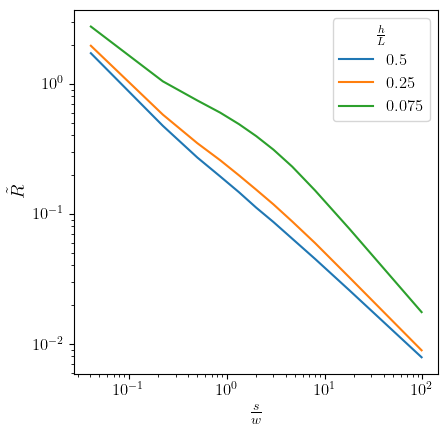

In [18]:
sim_jsons = !find output/conduit_flow -name simulation.json
rows = []
for f in sim_jsons:
    with open(f, "r") as fp:
        data = json.load(fp)
    rows.append(data)
df = pd.DataFrame(rows)
df.sort_values(by=['h/L', 'w/L'], inplace=True)

fig, ax = plt.subplots()
for h_L in [0.5, 0.25, 0.075]:
    df_seg = df[np.isclose(df['h/L'], h_L)]
    h_w = df_seg['h/w'].to_numpy()[0]
    ax.plot(df_seg['s/w'], df_seg['rtilde in'], label=h_L)

ax.legend(title=r'$\frac{h}{L}$');
ax.set_box_aspect(1);
ax.set_xlabel(r'$\frac{s}{w}$');
ax.set_ylabel(r'$\tilde{R}$');
ax.minorticks_on();
ax.semilogx();
ax.semilogy();
plt.tight_layout();
plt.savefig(f'{workdir}/rtilde-fea.{ext}', format=ext);

## First Mapping

In the first mapping, we have:

\begin{equation*}
w = \int_{z_0}^z \frac{1}{(s + b)^{\frac{1}{2}} (s + 1)^{\frac{1}{2}} (s - b)^{\frac{1}{2}} (s - 1)^{\frac{1}{2}}}\mathrm{ds}
\end{equation*}

In the second mapping, we have:
\begin{equation*}
w = \int_{z_0}^z \frac{1}{(s + b)^{\frac{1}{2}} (s + a)^{\frac{1}{2}} (s - b)^{\frac{1}{2}} (s - a)^{\frac{1}{2}}}\mathrm{ds}
\end{equation*}

### Geometric ratios
\begin{equation*}
b = \frac{2H}{L}
\end{equation*}

\begin{equation*}
a = 1 - \frac{2w}{L}
\end{equation*}

In [9]:
def get_half_chi_re(a):
    lb = 0.5 * (1 + a)
    ub = 1
    x = sympy.Symbol('x', real=True)
    integ = sympy.Integral(1/((1 - x**2) * (x**2 - a**2)) ** 0.5, (x, lb, ub)).evalf()
    re = sympy.re(integ)
    im = sympy.im(integ)

    return re

def get_chi_im_max(a):
    x = sympy.Symbol('x', real=True)
    integ = sympy.Integral(1/((x**2 - 1) * (x**2 - a**2)) ** 0.5, (x, -1, a)).evalf()
    re = sympy.re(integ)
    im = sympy.im(integ)

    return re

In [10]:
def Q(a, b, A=1):
    """
    Dimensionless flow rate
    """
    chi_im_max = get_chi_im_max(a)
    x = sympy.Symbol('x', real=True)
    integ = (1/A) * sympy.Integral((b**2 - x**2) ** 0.5 / (x**2 - a ** 2) ** 0.5, (x, a, 1)).evalf()
    re = sympy.re(integ)
    im = sympy.im(integ)

    return re / chi_im_max

def Rtilde(a, b, A=1, prefactor=1):
    """
    Dimensionless flow rate
    """
    chi_im_max = get_chi_im_max(a)
    print(chi_im_max)
    x = sympy.Symbol('x', real=True)
    integ = (1/A) * sympy.Integral(((b**2 - x**2) ** 0.5) / ((x**2 - a ** 2) ** 0.5), (x, a, 1)).evalf()
    re = sympy.re(integ)
    im = sympy.im(integ)

    return prefactor * chi_im_max / re

In [11]:
b_ = 1.00000000655085
a_ = 0.999999999679631
A_ = 0.0477940363868589
np.abs(float(Rtilde(a_, b_, A=A_)))

0.e+1


259740287.35625356

In [12]:
def q(a, b, x, A=1):
    chi_im_max = get_chi_im_max(a)
    return (1/A) * (b**2 - x**2) ** 0.5 / (x**2 - a ** 2) ** 0.5 / chi_im_max

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


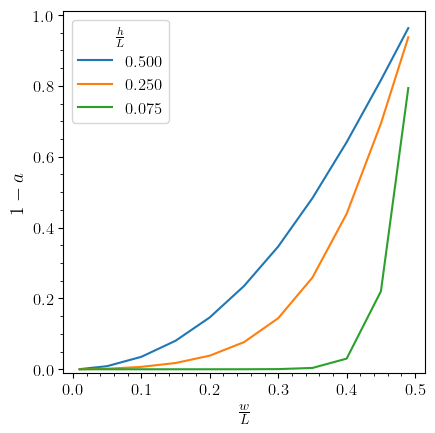

In [13]:
df = pd.read_csv("experimental/geometric-factors.csv")
fig, ax = plt.subplots()
df_seg = df[np.isclose(df['h_over_L'], 0.5)]
df_seg1 = df[np.isclose(df['h_over_L'], 0.25)]
df_seg2 = df[np.isclose(df['h_over_L'], 0.075)]
ax.plot(df_seg['w_over_L'], 1 - df_seg['a'], label='0.500');
ax.plot(df_seg1['w_over_L'], 1 - df_seg1['a'], label='0.250');
ax.plot(df_seg2['w_over_L'], 1 - df_seg2['a'], label='0.075');
ax.legend(title=r'$\frac{h}{L}$');
ax.set_box_aspect(1);
ax.set_xlabel(r'$\frac{w}{L}$');
ax.set_ylabel(r'$1 - a$');
ax.set_ylim([-0.01, 1.01]);
ax.minorticks_on();
plt.tight_layout();
plt.savefig(f'{workdir}/a-values.{ext}', format=ext)

In [14]:
# fig, ax = plt.subplots()
# b_values = df_seg['b'].to_numpy()
# h_over_L = df_seg['h_over_L'].to_numpy()
# w_over_L = df_seg['w_over_L'].to_numpy()
# a_values = df_seg['a'].to_numpy()
# k_values = df_seg['k'].to_numpy()
# A_values = df_seg['A'].to_numpy()
# A = A_values[0]
# Lc = 1.0
# h_over_w = 0
# q_values = []
# k = k_values[0]
# b = b_values[0]
# s_over_w = []
# for a in a_values:
#     phi = np.arcsin(a)
#     L = A * 2 * sp.ellipk(k**2)
#     w = A * (sp.ellipk(k**2) - sp.ellipkinc(phi, k**2))
#     h_over_w = h_over_L[0] * L / w
#     qbar = Q(a, b, A=A)/w * Lc
#     q_values.append(qbar)
#     s_over_w.append(L/w - 2)
# ax.plot(s_over_w, q_values, label=f'{h_over_w}');

# # new plot
# b_values = df_seg1['b'].to_numpy()
# h_over_L = df_seg1['h_over_L'].to_numpy()
# w_over_L = df_seg1['w_over_L'].to_numpy()
# a_values = df_seg1['a'].to_numpy()
# k_values = df_seg1['k'].to_numpy()
# # L_values = df_seg1['L'].to_numpy()
# A_values = df_seg['A'].to_numpy()
# A = A_values[0]
# q_values = []
# k = k_values[0]
# b = b_values[0]
# s_over_w = []
# for a in a_values:
#     phi = np.arcsin(a)
#     L = A * 2 * sp.ellipk(k**2)
#     w = A * (sp.ellipk(k**2) - sp.ellipkinc(phi, k**2))
#     h_over_w = h_over_L[0] * L /w
#     qbar = Q(a, b, A=A)/w * Lc
#     q_values.append(qbar)
#     s_over_w.append(L/w - 2)
# ax.plot(s_over_w, q_values, label=f'{h_over_w}');

# # new plot
# b_values = df_seg2['b'].to_numpy()
# h_over_L = df_seg2['h_over_L'].to_numpy()
# w_over_L = df_seg2['w_over_L'].to_numpy()
# a_values = df_seg2['a'].to_numpy()
# k_values = df_seg2['k'].to_numpy()
# # L_values = df_seg2['L'].to_numpy()
# A_values = df_seg['A'].to_numpy()
# A = A_values[0]

# q_values = []
# k = k_values[0]
# b = b_values[0]
# s_over_w = []
# for a in a_values:
#     phi = np.arcsin(a)
#     L = A * 2 * sp.ellipk(k**2)
#     w = A * (sp.ellipk(k**2) - sp.ellipkinc(phi, k**2))
#     h_over_w = h_over_L[0] * L /w
#     qbar = Q(a, b, A=A)/w * Lc
#     q_values.append(qbar)
#     s_over_w.append(L/w - 2)
# ax.plot(s_over_w, q_values, label=f'{h_over_w}');

# # formatting
# ax.legend(title=r'$\frac{h}{w}$');
# ax.set_box_aspect(1);
# ax.set_xlabel(r'$\frac{s}{w}$');
# ax.set_ylabel(r'$\tilde{q}$');
# ax.minorticks_on();
# ax.semilogx();
# ax.semilogy();
# plt.tight_layout();
# plt.savefig(f'{workdir}/qtilde.{ext}', format=ext);

0.e+0
0.e+0
0.e+0
0.e+0
0.e+0
0.e+0
0.e+0
0.e+1
0.e+1
0.e+1
0.e+1
0.e+0
0.e+0
0.e+0
0.e+0
0.e+0
0.e+1
0.e+0
0.e+1
0.e+1
0.e+1
0.e+1
0.e+0
0.e+0
0.e+1
0.e+1
0.e+1
0.e+1
0.e+1
0.e+1
0.e+1
0.e+1
0.e+1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


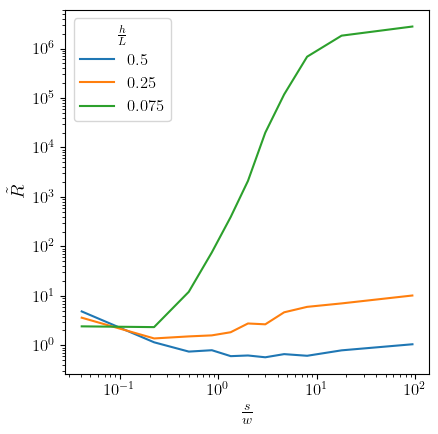

In [15]:
Lc = 1.0
fig, ax = plt.subplots()
b_values = df_seg['b'].to_numpy()
h_over_L = df_seg['h_over_L'].to_numpy()
w_over_L = df_seg['w_over_L'].to_numpy()
a_values = df_seg['a'].to_numpy()
k_values = df_seg['k'].to_numpy()
A_values = df_seg['A'].to_numpy()
A = A_values[0]
h_over_w = 0
s_over_w = []
r_values = []
k = k_values[0]
b = b_values[0]
for a in a_values:
    phi = np.arcsin(a)
    L = A * 2 * sp.ellipk(k**2)
    w = A * (sp.ellipk(k**2) - sp.ellipkinc(phi, k**2))
    h_L = h_over_L[0]
    # qtilde = Q(a, b, A=A)/w * Lc
    # r_values.append(1/qtilde)
    prefactor = w / (L - 2*w)
    rtilde = Rtilde(a, b, A=A, prefactor=prefactor)
    r_values.append(rtilde)
    s_over_w.append(L/w - 2)
ax.plot(s_over_w, r_values, label=f'{h_L}');

# new plot
b_values = df_seg1['b'].to_numpy()
h_over_L = df_seg1['h_over_L'].to_numpy()
w_over_L = df_seg1['w_over_L'].to_numpy()
a_values = df_seg1['a'].to_numpy()
k_values = df_seg1['k'].to_numpy()
A_values = df_seg1['A'].to_numpy()
A = A_values[0]
s_over_w = []

r_values = []
k = k_values[0]
b = b_values[0]
for a in a_values:
    phi = np.arcsin(a)
    L = A * 2 * sp.ellipk(k**2)
    w = A * (sp.ellipk(k**2) - sp.ellipkinc(phi, k**2))
    h_L = h_over_L[0]
    # qtilde = Q(a, b, A=A)/w * Lc
    # r_values.append(1/qtilde)
    prefactor = w / (L - 2*w)
    rtilde = Rtilde(a, b, A=A, prefactor=prefactor)
    r_values.append(rtilde)
    s_over_w.append(L/w - 2)
ax.plot(s_over_w, r_values, label=f'{h_L}');

# new plot
b_values = df_seg2['b'].to_numpy()
h_over_L = df_seg2['h_over_L'].to_numpy()
w_over_L = df_seg2['w_over_L'].to_numpy()
a_values = df_seg2['a'].to_numpy()
k_values = df_seg2['k'].to_numpy()
A_values = df_seg2['A'].to_numpy()
A = A_values[0]
s_over_w = []

r_values = []
k = k_values[0]
b = b_values[0]
for a in a_values:
    phi = np.arcsin(a)
    L = A * 2 * sp.ellipk(k**2)
    w = A * (sp.ellipk(k**2) - sp.ellipkinc(phi, k**2))
    h_L = h_over_L[0]
    # qtilde = Q(a, b, A=A) / w * Lc
    prefactor = w / (L - 2*w)
    rtilde = Rtilde(a, b, A=A, prefactor=prefactor)
    r_values.append(rtilde)
    # r_values.append(1/qtilde)
    s_over_w.append(L/w - 2)
ax.plot(s_over_w, r_values, label=f'{h_L}');

# formatting
ax.legend(title=r'$\frac{h}{L}$');
ax.set_box_aspect(1);
ax.set_xlabel(r'$\frac{s}{w}$');
ax.set_ylabel(r'$\tilde{R}$');
ax.minorticks_on();
ax.semilogx();
ax.semilogy();
plt.tight_layout();
plt.savefig(f'{workdir}/rtilde.{ext}', format=ext);

In [16]:
# eps = 1e-9
# z_dist = np.linspace(a_values[0] - eps, 1, num=10001)
# q_loc = [q(a_values[0], b_values[0], z) for z in z_dist]

In [17]:
# fig, ax = plt.subplots()
# ax.plot(z_dist - a_values[0], q_loc);
# # ax.legend();
# ax.set_box_aspect(1);
# ax.set_xlabel(r'$\Vert z - z*\Vert$');
# ax.semilogx();
# # ax.semilogy();
# ax.minorticks_on()
# ax.set_ylabel(r'$\tilde{q}$');
# plt.tight_layout();